In [123]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator as operator

In [125]:
election_day_pres = pd.read_csv('./detroit-election-day.txt')
avcb_pres = pd.read_csv('./detroit-avcb.txt')
election_day_sp = pd.read_csv('./detroit-election-day-sp.txt')
avcb_sp = pd.read_csv('./detroit-avcb-sp.txt')

city_name = 'Detroit'

In [126]:
#This is not the real total votes as only data for trump and biden are included in the spreadsheet


election_day_pres['total_votes'] = (
    election_day_pres['biden'] +
    election_day_pres['trump'] 
    )
avcb_pres['total_votes'] = (
    avcb_pres['biden'] +
    avcb_pres['trump'] 
)   
#Four categories
#election_day_pres: votes cast on election day excuding sp
#avcb_pres: av ballots excluding sp
#election_day_sp: votes cast on election day for sp
#avcb_sp: av ballots cast for sp
#1
election_day_pres['trump_pres'] = (
    election_day_pres['trump'] -
    election_day_sp['rep'] 
    )
election_day_pres['biden_pres'] = (
    election_day_pres['biden'] -
    election_day_sp['dem'] 
    )
election_day_pres['total_votes_pres'] = (
    election_day_pres['biden_pres'] +
    election_day_pres['trump_pres']
    )
#2
avcb_pres['trump_pres'] = (
    avcb_pres['trump'] -
    avcb_sp['rep'] 
    )
avcb_pres['biden_pres'] = (
    avcb_pres['biden'] -
    avcb_sp['dem'] 
    )
avcb_pres['total_votes_pres'] = (
    avcb_pres['biden_pres'] +
    avcb_pres['trump_pres']
)
#3
election_day_sp['total_votes_sp'] = (
    election_day_sp['dem'] +
    election_day_sp['rep'] 
    )
#4
avcb_sp['total_votes_sp'] = (
    avcb_sp['dem'] +
    avcb_sp['rep'] 
)


election_day_pres['trump_percent'] = election_day_pres['trump_pres'] / election_day_pres['total_votes_pres']*100
avcb_pres['trump_percent'] = avcb_pres['trump_pres'] / avcb_pres['total_votes_pres']*100
election_day_sp['trump_percent'] = election_day_sp['rep'] / election_day_sp['total_votes_sp']*100
avcb_sp['trump_percent'] = avcb_sp['rep'] / avcb_sp['total_votes_sp']*100



In [127]:
election_day_trump_percent_pres = election_day_pres['trump_percent'].tolist()
avcb_trump_percent_pres = avcb_pres['trump_percent'].tolist()
election_day_trump_percent_sp = election_day_sp['trump_percent'].tolist()
avcb_trump_percent_sp = avcb_sp['trump_percent'].tolist()

biden_election_day_pres = election_day_pres['biden_pres'].tolist()
biden_avcb_pres = avcb_pres['biden_pres'].tolist()
biden_election_day_sp = election_day_sp['dem'].tolist()
biden_avcb_sp = avcb_sp['dem'].tolist()


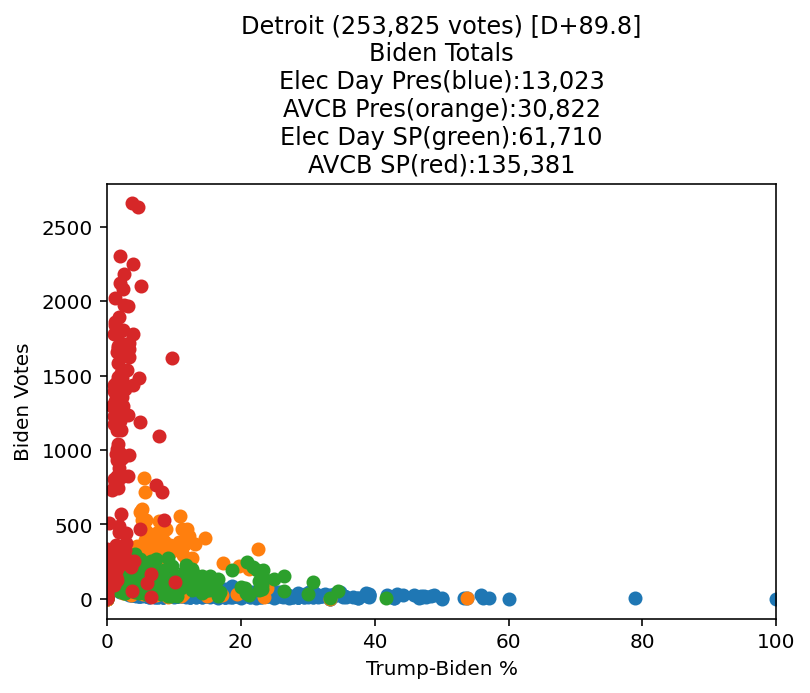

Trump: 12889, Biden: 240936


In [128]:
def addSlopeLine(xset, yset, color, cutoff,op):
    slope_points_x = []
    slope_points_y = []

    for index, value in enumerate(xset):
        if op(value,cutoff):
            slope_points_x.append(value)
            slope_points_y.append(yset[index])  

    m, b = np.polyfit(slope_points_x, slope_points_y, 1)
    x = np.array(slope_points_x)
    plt.plot(x, m*x + b, color=color, label=f'slope: {round(m, 3)}')

plt.scatter(
    election_day_trump_percent_pres,
    biden_election_day_pres
)
plt.scatter(
    avcb_trump_percent_pres,
    biden_avcb_pres
)

plt.scatter(
    election_day_trump_percent_sp,
    biden_election_day_sp
)
plt.scatter(
    avcb_trump_percent_sp,
    biden_avcb_sp
)

plt.xlim([0,100])
#plt.ylim([-50,100])
plt.xlabel('Trump-Biden %')
plt.ylabel('Biden Votes')
#plt.axvline(x=0.2, color='red', linestyle='dotted')

#addSlopeLine(trump_percent, biden_delta_percent, 'blue', cutoff, operator.ge)
#addSlopeLine(trump_percent, biden_delta_percent, 'blue', cutoff, operator.le)
#addSlopeLine(trump_percent, biden_delta_percent, 'black', 0.0, operator.ge)

#plt.legend(loc=0)

total_votes = election_day_pres['total_votes'].sum() + avcb_pres['total_votes'].sum()
trump_total = election_day_pres['trump'].sum() + avcb_pres['trump'].sum()
trump_percent = trump_total / total_votes
biden_total = election_day_pres['biden'].sum() + avcb_pres['biden'].sum()
biden_percent = biden_total / total_votes


if trump_percent > biden_percent:
    margin = 'R+' + "{:.1f}".format((trump_percent - biden_percent)*100)
else:
    margin = 'D+' + "{:.1f}".format((biden_percent - trump_percent)*100)
title = '{0} ({1} votes) [{2}]'.format(city_name, "{:,}".format(total_votes), margin)

election_day_pres_biden_total = "{:,}".format(election_day_pres['biden_pres'].sum())
avcb_pres_biden_total = "{:,}".format(avcb_pres['biden_pres'].sum())
election_day_sp_biden_total = "{:,}".format(election_day_sp['dem'].sum())
avcb_sp_biden_total = "{:,}".format(avcb_sp['dem'].sum())

title += '\nBiden Totals\nElec Day Pres(blue):{0}\nAVCB Pres(orange):{1}\nElec Day SP(green):{2}\nAVCB SP(red):{3}'.format(
    election_day_pres_biden_total,avcb_pres_biden_total,election_day_sp_biden_total,avcb_sp_biden_total)

plt.title(title)
plt.show()

print("Trump: {0}, Biden: {1}".format(trump_total, biden_total))